In [1]:
from scipy import stats
import numpy as np 
import pandas as pd

z_dist = stats.norm(0,1)

## Q1
### The null hypothesis for a test is 𝐻0: 𝜇 = 5. The population variance is 2. The sample mean in this case is 5.4 and the sample size is 36. Test the null hypothesis using the pvalue approach (provide test statistic, p-value, and decision):

#### a. 𝐻1: 𝜇 > 5 , with 𝛼 = 0.05

In [2]:
mu = 5
x_bar = 5.4
sigma = np.sqrt(2)
n = 36

z_test_statistic = (x_bar - mu)/(sigma/np.sqrt(n))
print(f"{z_test_statistic=}")

z_test_statistic=1.6970562748477154


In [3]:
p_val = (1 - z_dist.cdf(z_test_statistic))
print(p_val)

0.044843010885182166


In [4]:
alpha = 0.05

# Make decision based on p-value
decision = "Reject H0" if p_val <= alpha else "Fail to reject H0"
print(decision)

Reject H0


#### b. 𝐻1: 𝜇 > 5 , with 𝛼 = 0.01

In [5]:
alpha = 0.01

# Make decision based on p-value
decision = "Reject H0" if p_val <= alpha else "Fail to reject H0"
print(decision)

Fail to reject H0


#### c. 𝐻1: 𝜇 < 5 , with 𝛼 = 0.01

In [6]:
alpha = 0.01
p_val = z_dist.cdf(-z_test_statistic)
print(p_val)
decision = "Reject H0" if p_val <= alpha else "Fail to reject H0"
print(decision)

0.04484301088518217
Fail to reject H0


#### d. 𝐻1: 𝜇 ≠ 5 , with 𝛼 = 0.05

In [7]:
alpha = 0.05
p_val = 2 * (1 - z_dist.cdf(z_test_statistic))
print(p_val)
decision = "Reject H0" if p_val <= alpha else "Fail to reject H0"
print(decision)

0.08968602177036433
Fail to reject H0


#### e. 𝐻1: 𝜇 ≠ 5 , with 𝛼 = 0.10

In [8]:
alpha = 0.1
p_val = 2 * (1 - z_dist.cdf(z_test_statistic))
print(p_val)
decision = "Reject H0" if p_val <= alpha else "Fail to reject H0"
print(decision)

0.08968602177036433
Reject H0


## Q2 Now redo parts a-e from Q1 using the rejection region method (give the region anddecision). Do the 2 methods agree for each part?

In [9]:
# Given data
x_bar = 5.4
mu_0 = 5
sigma = np.sqrt(2)
n = 36

# Calculate the z-test statistic
z_statistic = (x_bar - mu_0) / (sigma/np.sqrt(n))

# Rejection regions and decisions for each case
alpha_values = [0.05, 0.01, 0.01, 0.05, 0.10]
tails = ['right', 'right', 'left', 'two', 'two']
decisions = []

for alpha, tail in zip(alpha_values, tails):
    if tail == 'right':
        z_critical = stats.norm.ppf(1 - alpha)
        decision = "Reject H0" if z_statistic > z_critical else "Fail to Reject H0"
    elif tail == 'left':
        z_critical = stats.norm.ppf(alpha)
        decision = "Reject H0" if z_statistic < z_critical else "Fail to Reject H0"
    else:  # two-tailed
        z_critical_right = stats.norm.ppf(1 - alpha/2)
        z_critical_left = stats.norm.ppf(alpha/2)
        decision = "Reject H0" if z_statistic > z_critical_right or z_statistic < z_critical_left else "Fail to Reject H0"
    decisions.append((tail, alpha, decision))

z_statistic, decisions


(1.6970562748477154,
 [('right', 0.05, 'Reject H0'),
  ('right', 0.01, 'Fail to Reject H0'),
  ('left', 0.01, 'Fail to Reject H0'),
  ('two', 0.05, 'Fail to Reject H0'),
  ('two', 0.1, 'Reject H0')])

## Q3. 
### A recent sample of 6-month car insurance premiums was sampled from a local insurance agent. They wanted to see if their average rates were similar to the national average. According to NerdWallet.com, the average rate of a 6-month policy is 713. They have provided you with the data in insurance.xlsx.
#### a. Do you think is data follows a normal distribution? Provide evidence to support your conclusion.

In [10]:
df = pd.read_excel("insurance.xlsx")
df['Premium USD'].describe()

count      34.000000
mean      625.406176
std       240.506640
min       174.650000
25%       443.702500
50%       583.230000
75%       815.820000
max      1185.290000
Name: Premium USD, dtype: float64

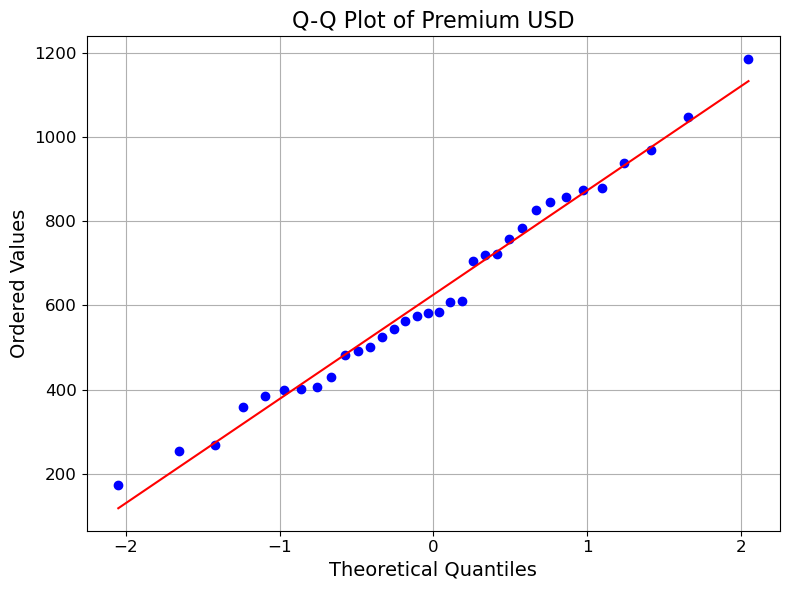

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sample pandas series (replace this with your actual data)
data = df['Premium USD']

# Create a figure with a specific size
plt.figure(figsize=(8, 6))

# Generate a Q-Q plot
stats.probplot(data, dist="norm", plot=plt)

# Enhance the plot
plt.title('Q-Q Plot of Premium USD', fontsize=16)  # Add a title with increased font size
plt.xlabel('Theoretical Quantiles', fontsize=14)  # Label x-axis
plt.ylabel('Ordered Values', fontsize=14)  # Label y-axis
plt.xticks(fontsize=12)  # Increase x-axis tick size
plt.yticks(fontsize=12)  # Increase y-axis tick size

# The grid aids in visual comparison
plt.grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


#### b. Perform the appropriate hypothesis test at 𝛼 = 0.05. Provide the null and alternative hypotheses, test statistic, p-value, and decision.

In [12]:
mu = 713
x_bar = 625.41
n = 34
s = 240.51
alpha = .05

t_test_stat = (x_bar - mu)/(s/np.sqrt(n))
print(t_test_stat)

p_val = 2 * (1 - stats.t.cdf(abs(t_test_stat),n-1))
print(p_val)

-2.1235419586275004
0.04129343818147957


#### c. What would you conclude to the agency? How are they doing compared to the national average?

with a p-value of 0.0413, which is less than 0.05, we reject the null hypothesis.
Based on the sample data, there is evidence to suggest that the local agency's average 6-month car insurance premium is different from the national average. In particular, with a sample mean of 625.41, the agency's average rates are lower than the national average of 713.

#### d. Suppose you think a confidence interval would be an appropriate addition to your analysis for the agency. Construct and interpret the appropriate confidence interval

In [13]:
# Given data
x_bar = 625.406176
s = 240.506640
n = 34

# t-value for alpha/2 = 0.025 and df = n-1 for a 95% CI
t_critical = stats.t.ppf(1 - 0.025, df=n-1)

# Calculate the confidence interval
lower_bound = x_bar - t_critical * (s/np.sqrt(n))
upper_bound = x_bar + t_critical * (s/np.sqrt(n))

lower_bound, upper_bound


(541.4894421557872, 709.3229098442127)

## Q4
### In a random sample of 400 industrial accidents, it was found that 231 were due at least partially to unsafe working conditions. Is it reasonable to claim that at more than half of accidents are partially caused due to unsafe working conditions? Use α = 0.01.

#### a. Give the null and alternative hypotheses, test statistic, rejection region, decision, and a conclusion in the context of the problem.


$$
H_0 => p=0.5 
\\ 
H_1 => p > 0.5
$$

In [14]:
# Given data
p_hat = 231/400  # sample proportion
p_0 = 0.5  # hypothesized population proportion
n = 400  # sample size

# Calculate the test statistic
z_statistic = (p_hat - p_0) / np.sqrt(p_0 * (1-p_0) / n)

# Critical z-value for alpha = 0.01
z_critical = stats.norm.ppf(0.99)

# Decision
decision = "Reject H0" if z_statistic > z_critical else "Fail to Reject H0"

print(z_statistic, z_critical, decision)

3.1000000000000005 2.3263478740408408 Reject H0


In [15]:
print("""Based on the sample data and at a significance level of  alpha=0.01 there is enough evidence to support the claim that more than half of the accidents are partially caused due to unsafe working conditions.""")

Based on the sample data and at a significance level of  alpha=0.01 there is enough evidence to support the claim that more than half of the accidents are partially caused due to unsafe working conditions.


#### b. Assume that you now want to create a confidence interval/bound. Would you create a confidence interval, upper bound, or lower bound? Give that interval and interpret. Did you get the same result as part a?

In [16]:
# Calculate the lower bound of the 99% confidence interval for the proportion
lower_bound = p_hat - z_critical * np.sqrt(p_hat * (1-p_hat) / n)

lower_bound


0.5200441818255743

In part a, we rejected the null hypothesis, suggesting that more than half of the accidents are partially caused due to unsafe working conditions. The confidence interval in part b supports this conclusion, as the lower bound is above 0.5.

Thus, both the hypothesis test and the confidence interval yield consistent results.​

## Q5
### . A paint manufacturer uses a large amount of titanium dioxide in its coatings. Titanium dioxide is the primary white pigment used in paints and coatings. Industry measures the “whiteness” of this pigment using a scale of 0-30, with 30 being essentially perfectly white. A new vendor claims that its titanium dioxide averages 25 on the whiteness scale with a variance no larger than 1.5. The manufacturer doubts that the new vendor has such a small amount of variability in his product, so they tests the next 14 shipments, which are in the file whiteness.xlsx
### Can we disprove the vendor's claim (with respect to variability)? Test this statement at 𝛼=0.05. Give null and alternative hypotheses, test statistic, p-value, decision, and conclusion. 

In [17]:
df = pd.read_excel('whiteness.xlsx')

In [18]:
np.var(df['Whiteness'])

2.9795918367346945

$$
H_0 = Var(X) = 1.5 \\ 
H_1 = Var(X) > 1.5
$$
We will use the chi-square test statistic for a variance, which is defined as:
$$
\sigma^2 = \frac{(n-1)*s^2}{\sigma_0^2}
\\
\sigma^2 = \frac{13*2.98}{1.5} 
\\ 
\sigma^2 = 27.81
$$

In [19]:
chi2_critical = stats.chi2.ppf(0.95, 13)
print(f"{chi2_critical=}")

chi2_critical=22.362032494826934


In [20]:
chi2_statistic = 27.81
p_value = 1 - stats.chi2.cdf(chi2_statistic, 13)
print(f"{p_value}")

0.00961822837007864


In [21]:

decision = "Decision: We do not believe the vendor's claim about the whiteness of the titanium dioxide."
conclusion = "Conclusion: The test shows that the whiteness varies more than what the vendor told us."

decision, conclusion


("Decision: We do not believe the vendor's claim about the whiteness of the titanium dioxide.",
 'Conclusion: The test shows that the whiteness varies more than what the vendor told us.')